In [89]:
import pandas as pd
import numpy as np
import nltk # natural language toolkit
#nltk.download()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # TF, TFIDF
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
import nltk
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
 
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup
from future.utils import iteritems
import os

In C:\Users\evkikum\AppData\Local\Continuum\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\evkikum\AppData\Local\Continuum\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\evkikum\AppData\Local\Continuum\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [67]:
os.chdir(r"C:\Users\evkikum\OneDrive - Ericsson AB\UseCaseData\NLP\LayProgrammer")

In [68]:
wordnet_lemmatizer = WordNetLemmatizer()
titles = [line.rstrip() for line in open("data/all_book_titles.txt")]
stopwords = set(w.rstrip() for w in open("data/stopwords.txt"))

stopwords = stopwords.union({
    'introduction',"edition","series","application"})

In [69]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [70]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []


In [71]:
for title in titles:
    try:
       ## title = title.encode('ascii','ignore')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:                
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass

In [81]:
df = pd.DataFrame()

In [82]:
for tokens in all_tokens:
    data = pd.DataFrame()
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    x = x/x.sum()    
    data['x'] = x
    data = data.T
    data = data.reset_index()
    data = data.drop(["index"], axis = 1)    
    df = df.append(data)
    

In [84]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084
0,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.00,0.00,0.00,0.00,0.25,0.25,0.25,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
svd = TruncatedSVD()
Z = svd.fit_transform(df)


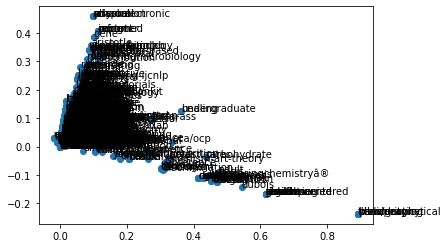

In [94]:
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(word_index_map)):
    plt.annotate(s=index_word_map[i],xy=(Z[i,0],Z[i,1]))
plt.show()